In [54]:
# Import the dependencies.

# Mandatory
from sqlalchemy import create_engine, text, inspect

# ORM imports - for classes
from sqlalchemy import Column, Integer, String, Float, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base

# data science
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sc

#SQL imports
import psycopg2


# Create a base class for declaring class definitions to produce Table objects
Base = declarative_base()
session = Session(bind=engine)

C:\Users\jwlos\AppData\Local\Temp\ipykernel_12576\1499660213.py:23: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [7]:
sql_username = "postgres"
sql_password = "postgres"
sql_ip = "localhost"
port = 5432 #default
database = "project2_db"

In [8]:
connection_string = f"postgresql+psycopg2://{sql_username}:{sql_password}@{sql_ip}:{port}/{database}"
engine = create_engine(connection_string)

In [9]:
# INSPECT

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
-----------
contact_id INTEGER
first_name VARCHAR(100)
last_name VARCHAR(100)
email VARCHAR(500)

campaign
-----------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(500)
description VARCHAR(500)
goal INTEGER
pledged INTEGER
outcome VARCHAR(150)
backers_count INTEGER
country VARCHAR(50)
currency VARCHAR(50)
launch_date DATE
end_date DATE
category_ids VARCHAR(30)
subcategory_ids VARCHAR(30)

subcategory
-----------
subcategory_ids VARCHAR(300)
sub-category VARCHAR(300)

category
-----------
category_ids VARCHAR(100)
category VARCHAR(300)



In [14]:
#connections test 
query = ("""
    SELECT *
    from campaign as ca
    inner join category as cat on cat.category_ids = ca.category_ids
    inner join contacts as con on con.contact_id = ca.contact_id
    inner join subcategory as sub on sub.subcategory_ids = ca.subcategory_ids
""")

df = pd.read_sql(text(query), con=engine)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cf_id            1000 non-null   int64 
 1   contact_id       1000 non-null   int64 
 2   company_name     1000 non-null   object
 3   description      1000 non-null   object
 4   goal             1000 non-null   int64 
 5   pledged          1000 non-null   int64 
 6   outcome          1000 non-null   object
 7   backers_count    1000 non-null   int64 
 8   country          1000 non-null   object
 9   currency         1000 non-null   object
 10  launch_date      1000 non-null   object
 11  end_date         1000 non-null   object
 12  category_ids     1000 non-null   object
 13  subcategory_ids  1000 non-null   object
 14  category_ids     1000 non-null   object
 15  category         1000 non-null   object
 16  contact_id       1000 non-null   int64 
 17  first_name       1000 non-null   o

In [18]:
#Query 1 - Raw SQL - Group by country and returning outcome to show which countries have the most successful campaigns

query1 = """
        SELECT
            country,
            COUNT(*) AS successful_campaigns
        FROM
            campaign
        WHERE
            outcome = 'successful'
        GROUP BY
            country
        ORDER BY
            successful_campaigns DESC;
"""

query_1df = pd.read_sql(text(query1), con=engine)
query_1df.head()

,country,successful_campaigns
0,US,436
1,GB,28
2,IT,26
3,AU,24
4,CA,22


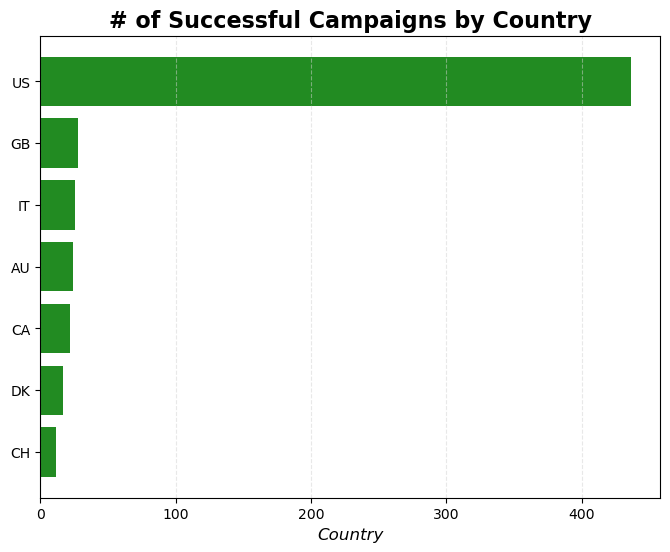

In [23]:
# BAR H
# Step 1: Get the data
x = np.flip(query_1df["country"])
y = np.flip(query_1df["successful_campaigns"])


# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.barh(x, y, color="forestgreen")

# Step 4: Customization
plt.xlabel("Country", fontsize=12, fontstyle="italic")
plt.title("# of Successful Campaigns by Country", fontsize=16, fontweight="bold")

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)
# plt.vlines(avg_num, 0, 7, color="black", linestyle="--")
# plt.text(9e6, 1, "Average Number of Checkouts")

# Step 5: Show/Save
plt.show()

In [24]:
#Query 2 - Raw SQL - group by category IDs to show the most popular types of campaigns
query2 = """select cat.category, count(ca.outcome) as successful_campaigns
from campaign as ca
inner join category as cat on cat.category_ids = ca.category_ids
where ca.outcome = 'successful'
group by cat.category
order by successful_campaigns DESC ;"""


query_2df = pd.read_sql(text(query2), con=engine)
query_2df.head()

,category,successful_campaigns
0,theater,187
1,film & video,102
2,music,99
3,technology,64
4,publishing,40


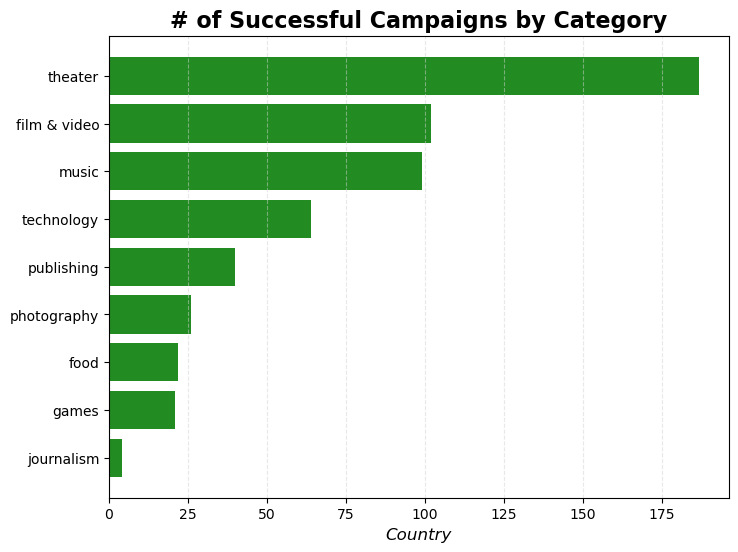

In [25]:
# BAR H
# Step 1: Get the data
x = np.flip(query_2df["category"])
y = np.flip(query_2df["successful_campaigns"])


# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.barh(x, y, color="forestgreen")

# Step 4: Customization
plt.xlabel("Country", fontsize=12, fontstyle="italic")
plt.title("# of Successful Campaigns by Category", fontsize=16, fontweight="bold")

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)
# plt.vlines(avg_num, 0, 7, color="black", linestyle="--")
# plt.text(9e6, 1, "Average Number of Checkouts")

# Step 5: Show/Save
plt.show()

In [68]:
#Query 3 - Raw SQL - group by sub-category IDs to show the most popular types of campaigns

query3 = 
    """SELECT 
    c.subcategory_ids,
    s."sub-category",
    COUNT(c.cf_id) AS number_of_campaigns
FROM 
    campaign c
JOIN
    subcategory s ON c.subcategory_ids = s.subcategory_ids
GROUP BY 
    c.subcategory_ids, s."sub-category"
ORDER BY 
    number_of_campaigns DESC;"""

query_3df = pd.read_sql(text(query3), con=engine)
query_3df.head()


,subcategory_ids,sub-category,number_of_campaigns
0,subcat4,plays,344
1,subcat2,rock,85
2,subcat5,documentary,60
3,subcat3,web,51
4,subcat1,food trucks,46


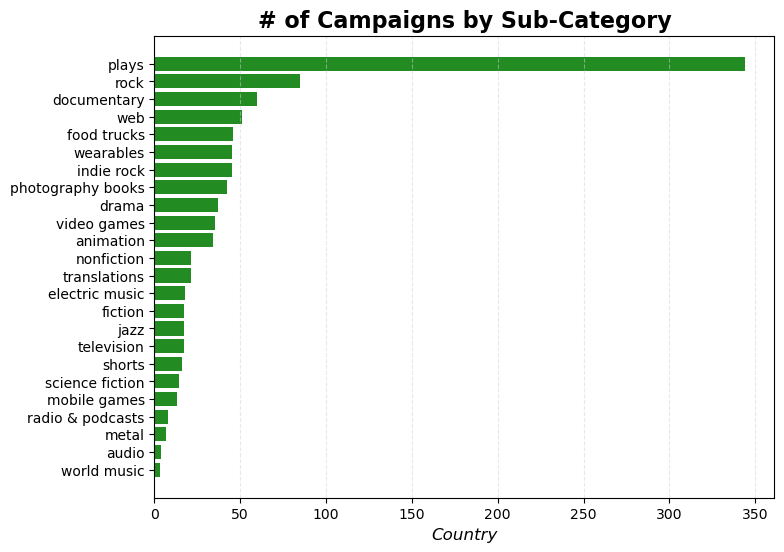

In [70]:
# BAR H
# Step 1: Get the data
x = np.flip(query_3df["sub-category"])
y = np.flip(query_3df["number_of_campaigns"])


# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.barh(x, y, color="forestgreen")

# Step 4: Customization
plt.xlabel("Country", fontsize=12, fontstyle="italic")
plt.title("# of Campaigns by Sub-Category", fontsize=16, fontweight="bold")

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)
# plt.vlines(avg_num, 0, 7, color="black", linestyle="--")
# plt.text(9e6, 1, "Average Number of Checkouts")

# Step 5: Show/Save
plt.show()